In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('dataset.csv')
df.head()

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1897 non-null   float64
 1   feature_2  1899 non-null   float64
 2   feature_3  1893 non-null   float64
 3   feature_4  1897 non-null   float64
 4   isVirus    1999 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 64.5 KB


In [19]:
df.shape

(1999, 5)

<AxesSubplot:>

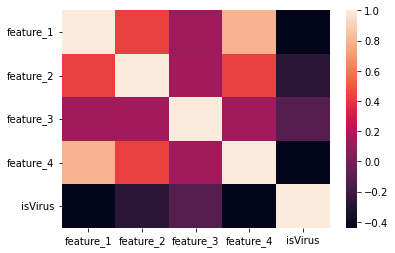

In [20]:
sns.heatmap(df.corr())

In [21]:
df.isnull().sum()

feature_1    102
feature_2    100
feature_3    106
feature_4    102
isVirus        0
dtype: int64

In [22]:
df.eq(0).sum()

feature_1       0
feature_2       0
feature_3       0
feature_4       0
isVirus      1332
dtype: int64

In [23]:
df[['feature_1','feature_2','feature_3','feature_4'
    ]] = df[['feature_1','feature_2','feature_3','feature_4'
    ]].replace(0,np.NaN)

In [24]:
#Eksik Degerleri Ortalama ile Dolduralim
df.fillna(df.mean(), inplace = True)

In [25]:
df.head()

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True


In [26]:
df.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
isVirus      0
dtype: int64

In [27]:
df.eq(0).sum()

feature_1       0
feature_2       0
feature_3       0
feature_4       0
isVirus      1332
dtype: int64

In [28]:
#Korelasyon analizi
df.corr()

,feature_1,feature_2,feature_3,feature_4,isVirus
feature_1,1.000000,0.407663,0.122183,0.746800,-0.428532
feature_2,0.407663,1.000000,0.136955,0.414945,-0.267592
feature_3,0.122183,0.136955,1.000000,0.125188,-0.111629
feature_4,0.746800,0.414945,0.125188,1.000000,-0.426005
isVirus,-0.428532,-0.267592,-0.111629,-0.426005,1.000000


<AxesSubplot:>

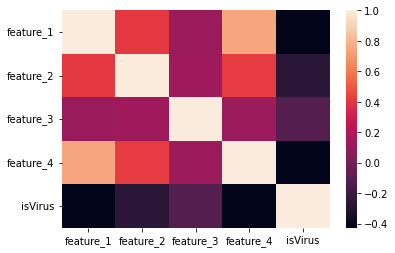

In [29]:
sns.heatmap(df.corr())

In [31]:
features_names = df.corr().nlargest(4,'isVirus').index.tolist()

In [32]:
#ALgoritmalarin Olusturulmasi
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [33]:
X = df[['feature_1','feature_2','feature_3','feature_4']] 
y = df.iloc[:,4]

In [34]:
log_reg = linear_model.LogisticRegression()

In [35]:
log_reg_score = cross_val_score(log_reg,X,y,cv = 10, scoring='accuracy').mean()

In [36]:
log_reg_score

0.6033969849246232

In [37]:
results = []
results.append(log_reg_score)

In [38]:
results

[0.6033969849246232]

In [39]:
from sklearn import svm

In [40]:
linear_svm = svm.SVC(kernel='linear')

In [41]:
linear_svm_score = cross_val_score(linear_svm,X,y,cv = 10, scoring='accuracy').mean()

In [42]:
linear_svm_score

0.5093341708542714

In [43]:
results.append(linear_svm_score)

In [44]:
results

[0.6033969849246232, 0.5093341708542714]

In [45]:
#Sonuc olarak veri setimiz az ve eksik oldugu ve biz bu eksik verileri kendimiz doldurdugumuz icin cok yuksek bir dogruluk puani alamadik